## Notebook 3 - 2025 (28 Points)

#### Authors:

In [9]:
#import packages here

#### As discussed in the lectures, the interaction between support structures and manufactured parts plays a critical role in determining the final quality and performance of a component.  
#### Various factors must be evaluated when designing support strategies and tool-part interfaces, such as: ease of removal, impact on surface finish, thermal behavior during processing, structural stability, material usage, and potential defect formation.  
#### Overall, understanding how support structures and tool-part interactions influence manufacturing outcomes is essential for achieving reliable components and consistent production. Therefore, multiple aspects related to support design, tool influence, and their implications on part integrity will be explored and analyzed in this notebook.


### Question 1 (7 points)

#### Question 1.1: 
#### Continuous welding, such as ultrasonic continuous welding, results in a local spot load of 5 kN (treated as a point load). In contrast, one-go welding methods, such as induction welding, apply a uniform pressure of 1 MPa over the entire support length of 1780 mm. The weld area has a width of 30 mm, and the rectangular support profile has a width B=40 mm, as shown in Figure 1

#### Determine the required height of the rectangular support profile, given that its maximum allowable deflection is 0.2 mm. The profile has a thickness of 6 mm and a width of 40 mm and is made from steel. Since, the thickness-to-width ratio is relatively large, the section cannot be treated as thin-walled for this calculation.



<img src="rectangular_Profile2.png" width="900" height="300"> 


<img src="rectangular_Profile.png" width="300" height="300"> 

Figure 1. Support structure on the left figure, welding profile in the middle figure (with support profile visible in the back), support profile cross-section shown in the right figure, with given dimensions.

In [16]:
#Answer
b = 0.04  # m
t = 0.006  # m
pressure = 1e6  # Pa
application_width = 0.03  # m

distributed_force = pressure * application_width  # N/m
beam_length = 1.78  # m
E = 210e9  # P

def I_solid_beam(h):
    return b*h**3/12

def I_negative_beam(h):
    return (b-2*t)*(h-2*t)**3/12

def I_rectangular_profile(h):
    return I_solid_beam(h) - I_negative_beam(h)

delta_m = 0.0002  # m

def delta_distributed_load(I):
    return 5*distributed_force*beam_length**4/(384*E*I)
from scipy.optimize import bisect
def objective(h):
    I = I_rectangular_profile(h)
    delta = delta_distributed_load(I)
    return delta - delta_m

h_solution = bisect(objective, 2*t, 0.5)
print("required height of supporting beam is: ", h_solution, " m")

required height of supporting beam is:  0.42800582484350885


#### Question 1.2: 
#### Please comment on the obtained result and discuss its implications. Additionally, describe alternative support-structure options that could be used behind the to-be-welded structure, assuming you are not restricted to the selected profile. (No calculations required)

Answer:
The large required load coupled with the very small allowable deflection results in a tall beam with a height of around 0.43 meters. This would result in a very heavy beam, and if a CNC gantry is to be used to position the structure, this would require a stiffer and thus more expensive gantry system. In order to save material, it may be better to use an I-beam or a more complicated truss structure with a larger portion of it's material positioned as far away from the neutral bending axis as possible, resulting in a lighter structure for the same stiffness.

### Question 2 (5 points)

#### An L-shaped stiffener must be fitted into a curved skin while welding a pre-manufactured stiffener —with straight edges— onto a fuselage panel that has a defined radius.


<p align ="center">
  <img src="Stiffener.png" width="600" height="400">
</p> 


Figure 2. Sketch of circular fuselage structure and stiffener cross-section

#### Question 2.1: 
#### Calculate the total force required to bend the stiffener, assuming its length to be 750 mm, as a function of the fuselage radius (ranging from 2 to 6 meters). Model the stiffener as a flat plate —considering only the horizontal flange— with a thickness of 2.5 mm and an isotropic Young’s modulus of 52 GPa.

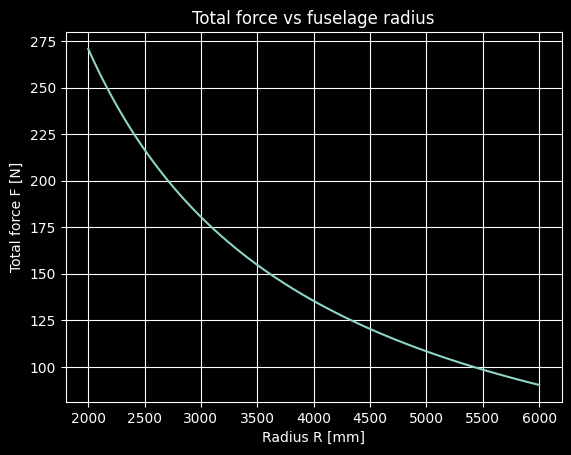

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Material and geometry
E = 52000          # Young's modulus [N/mm^2]
L = 750             # Plate length [mm]
b = 750             # Width along neutral axis [mm]
t = 2.5             # Thickness [mm]

# Second moment of area
I = b * t**3 / 12   # [mm^4]

# Radius range (increasing left -> right)
R = np.linspace(2000, 6000, 100)   # [mm]

# Curvature
kappa = 1 / R       # [1/mm]

# Distributed load and total force
q = (8 * E * I * kappa) / (L**2)   # [N/mm]
F_total = q * L                   # [N]

# Plot
plt.plot(R, F_total)
plt.xlabel("Radius R [mm]")
plt.ylabel("Total force F [N]")
plt.title("Total force vs fuselage radius")
plt.grid(True)
plt.show()


#### Question 2.2: 
#### Up to what fuselage radius or stiffener length is it realistically feasible to deform the stiffener, and what factors determine this limit?

Answer:

First and foremost, in order for the stringer to adequately comply with the fuselage curvature,the plate has to deform in the plastic region such that the stringer does not spring back into the original shape. The absolute limit would be the ultimate tensile strength but in order to prevent mechanical failure, an acceptable safety factor must be applied. In view of this, one will be able to deduce the corresponding minimal fuselage radius, namely the maximal curvature that guarantees safe operation.

Determining factors:
- Press material (main focus on stiffness)
- Stiffener toughness










### Question 3 (8 points)

#### When using a heated tool during winding, the difference in thermal expansion between the composite structure and the metal tool is often exploited to create clearance after cooldown. Assume that a clearance of 0.5 mm is required to remove the part from the tool at room temperature (20 °C).


#### Question 3.1:
#### Given the coefficients of thermal expansion for aluminum (22×10⁻⁶ /K) and steel (15×10⁻⁶ /K), and assuming the composite part has a negligible CTE, determine and plot the temperature difference required to achieve the needed clearance as a function of the outer radius at room temperature.

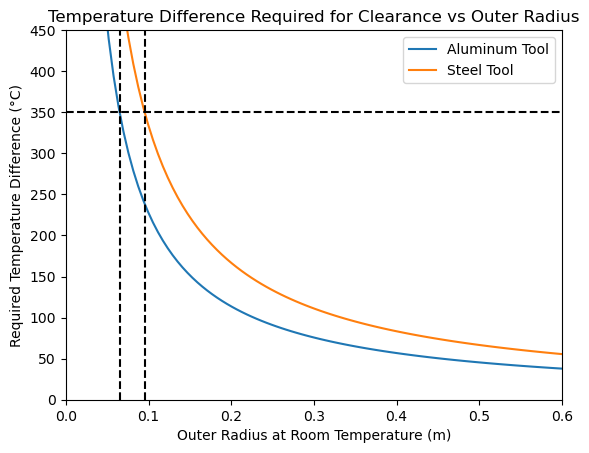

In [32]:
import numpy as np
import matplotlib.pyplot as plt

room_temp = 20  # °C
clearance = 0.5e-3  # m

def radial_expansion(T, radius, CTE):
    delta_T = T - room_temp
    circumference = 2*np.pi*radius
    circumferential_expansion = CTE * delta_T * circumference
    return circumferential_expansion / (2 * np.pi)

radii = np.linspace(0.01, 0.6, 100)  # meters

temp_diff_aluminum = clearance / (radii * 22e-6)
temp_diff_steel = clearance / (radii * 15e-6)
plt.plot(radii, temp_diff_aluminum, label='Aluminum Tool')
plt.plot(radii, temp_diff_steel, label='Steel Tool')
plt.xlabel('Outer Radius at Room Temperature (m)')
plt.ylabel('Required Temperature Difference (°C)')
plt.xlim(0, radii[-1])
plt.ylim(0, 450)
plt.axhline(y=350, color='k', linestyle='--')
plt.axvline(x=0.065, color='k', linestyle='--')
plt.axvline(x=0.096, color='k', linestyle='--')
plt.title('Temperature Difference Required for Clearance vs Outer Radius')
plt.legend()
plt.show()

#### Question 3.2:
#### Based on this plot, what would you consider the minimum feasible radius for using heated tooling with each material type, assuming the composite material is CF/PEEK?

Given that the lower end in the range of consolidation temperatures for CF/PEEK is around 370°C, with a room temperature of 20°C, a temperature difference of 350°C is achieved. We can determine the minimum feasible radius by finding the point on the plot where the required temperature difference does not exceed this value.

Reading from the plot we find that this limit for aluminium is around 0.065 m, while for steel it is around 0.096 m.

#### Question 3.3:
#### In the previous step it was assumed that CTE for the CF/PEEK material is zero. If the composite instead had a non-zero CTE, would the minimum feasible radius for using heated tooling increase or decrease? Explain your reasoning.

If the CTE of the composite material is positive but lower than the tool's, the part would also shrink during cooling, thus requiring a larger temperature difference to achieve the same clearance at room temperature. This results in a larger minimum radius for a given temperature difference.

For a negative CTE, as found in carbon fiber, the part would expand during cooling, thus reducing the required temperature difference. Note that the part's CTE is not equal to that of individual fibers, so the degree to which this occurs depends on many factors including the stacking sequence. This would result in a smaller minimum radius for a given temperature difference.

### Question 4 (8 points)

#### Heat dissipation is a major challenge in both welding and AFP with in-situ consolidation. Assume that a local region is heated to 400°C. Calculate, for both steel (specific heat capacity: 510 J/(kg·K)) and aluminum (specific heat capacity: 920 J/(kg·K)), the time required for this region to cool down, assuming the surrounding panel remains at a constant temperature T_tool. Assume further that no heat is lost to the surrounding air.

#### Use the following relations to model the part:

#### Area over which the temperature spreads (this region has a uniform temperature; the rest of the panel stays at T_tool):


#### - For aluminium = 1 + (t/2)<sup>2</sup> \[mm<sup>2</sup>\] (i.e., start with an area of 1 mm<sup>2</sup> at t=0)
#### - For steel = 1 + (t/4)<sup>2</sup> \[mm<sup>2</sup>\] (i.e., start with an area of 1 mm<sup>2</sup> at t=0)
#### Energy is related to temperature according to Q = m c ΔT, where m is the mass, c is the specific heat capacity and ΔT is the change in temperature.
#### Energy equilibrium means the area of the part that is cooling down is losing energy according to Q = m<sub>cooling</sub> c (T<sub>hot,t=i</sub> – T<sub>hot,t=i+1</sub>); and the part that is heating up is gaining energy according to Q = m<sub>heating</sub> c (T<sub>tool</sub> – T<sub>hot,t=i+1</sub>). 

#### The tool temperature can be assumed to be constant, T<sub>hot,t=i+1</sub> is the temperature after this step, and is the same for the part cooling and heating.


#### Question 4.1: 
#### Plot the temperature at the heated spot as a function of time for both tool materials, and for T_tool equal to 20°C, 50°C, 100°C and 125°C. 

In [1]:
#Answer:









#### Question 4.2:
#### Discuss the implications these results have when the manufacturing of CF/PEEK laminates with AFP. 

Answer:










#### Question 4.3:
#### Discuss the validity of the assumptions you used for the calculations

Answer:








